In [1]:
import torch
print(torch.version.cuda)
print(torch.cuda.is_available())
print(torch.cuda.device_count())

12.4
True
1


In [2]:
import sys
import os
import pickle
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

# Add the src directory to sys.path
src_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(src_path)

from src.IndependentSteps import Pycromanager2NativeDataType, FFF2NativeDataType, Make_Output_Dir_JF, Make_Analysis_Dir_JF, \
                                    ConsolidateImageShapes, TrimZSlices, AutomaticSpotDetection_JF

from src.SequentialSteps import CellSegmentationStepClass_JF, BIGFISH_SpotDetection, SimpleCellposeSegmentaion

from src.FinalizationSteps import BuildPDFReport, SaveSpotDetectionResults, SaveMasksToAnalysis, SendAnalysisToNAS

from src import Experiment, Settings, ScopeClass, Pipeline, DataContainer

print('Will it blend?')

Will it blend?


In [3]:
# raw_data_dir = r'C:\Users\Jack\Desktop\H128_Tiles_100ms_5mW_Blue_15x15_10z_05step_2'
raw_data_dir = r'smFISH_images\Eric_smFISH_images\20230511\DUSP1_DexTimeConcSweep_10nM_75min_041223'
# Build Setting Classes
pipelineSettings = Settings(user_select_number_of_images_to_run=3, local_or_NAS=0)
pipelineSettings.verbose = 0
pipelineSettings.bigfish_min_threshold = 0
pipelineSettings.bigfish_alpha = 0.5
pipelineSettings.bigfish_min_threshold = 10
pipelineSettings.cellpose_diameter = 150
pipelineSettings.cellpose_model_type = ['cyto3', 'nuclei']
pipelineSettings.display_plots = True
pipelineSettings.MINIMAL_NUMBER_OF_Z_SLICES_TO_CONSIDER_A_3D_IMAGE = 5


terminatorScope = ScopeClass()

experiment = Experiment()
experiment.initial_data_location = raw_data_dir
experiment.cytoChannel = [1]
experiment.nucChannel = [2]
experiment.FISHChannel = [0]

pipelineData = DataContainer()

# Create Pipeline 
prePipelineSteps = [FFF2NativeDataType(), Make_Output_Dir_JF(), Make_Analysis_Dir_JF(), ConsolidateImageShapes(), TrimZSlices()]
pipelineSteps = [SimpleCellposeSegmentaion(), BIGFISH_SpotDetection()]
postPipelineSteps = [BuildPDFReport(), SaveSpotDetectionResults(), SaveMasksToAnalysis()]
pipeline = Pipeline(pipelineSettings, terminatorScope, experiment, pipelineData, prePipelineSteps, postPipelineSteps, pipelineSteps)


The following parameters are required in the run the pipeline
['map_id_imgprops', 'output_location', 'spot_z', 'df_spotresults', 'num_img_2_run', 'image', 'df_cellresults', 'voxel_size_yx', 'cytoChannel', 'nucChannel', 'number_of_Z', 'FISHChannel', 'analysis_location', 'MINIMAL_NUMBER_OF_Z_SLICES_TO_CONSIDER_A_3D_IMAGE', 'id', 'kwargs', 'df_clusterresults', 'list_images', 'spot_yx', 'initial_data_location', 'voxel_size_z']


INFO:SMB.SMBConnection:Authentication with remote machine "MUNSKY-NAS.ENGR.COLOSTATE.EDU" for user "formanj" will be using NTLM v2 authentication (with extended security)
INFO:SMB.SMBConnection:Now switching over to SMB2 protocol communication
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_NEGOTIATE" (command:0x0000 flags:0x0001)
INFO:SMB.SMBConnection:SMB2 dialect negotiation successful
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_SESSION_SETUP" (command:0x0001 flags:0x0001)
INFO:SMB.SMBConnection:Performing NTLMv2 authentication (on SMB2) with server challenge "b'08f8894b372ead97'"
INFO:SMB.SMBConnection:Performing NTLMv2 authentication (on SMB2) with server challenge "b'08f8894b372ead97'"
DEBUG:SMB.SMBConnection:NT challenge response is "b'ae27331a34d2d49f20db565736478eaf01010000000000000000000000000000cd9b784ad445e996000000000200100045004e00470052005f0044004f004d00010014004d0055004e0053004b0059002d004e00410053000400240065006e00670072002e0063006f006c006f007300740

FFF2NativeDataType
Connection established


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_QUERY_DIRECTORY" (command:0x000E flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_QUERY_DIRECTORY" (command:0x000E flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_CLOSE" (command:0x0006 flags:0x0001)


File Downloaded : ROI024_XY1683821753_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_CREATE" (command:0x0005 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_QUERY_INFO" (command:0x0010 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0

File Downloaded : ROI016_XY1683821745_Z00_T0_C0.log
File Downloaded : analysis_DUSP1_DexTimeConcSweep_10nM_75min_041223___nuc_102__cyto_202__psfz_350__psfyx_160__ts_375.zip


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI001_XY1683820102_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI022_XY1683821751_Z00_T0_C0.log
File Downloaded : ROI020_XY1683821749_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI026_XY1683821755_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI018_XY1683821747_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI014_XY1683820745_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI019_XY1683821748_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI002_XY1683820103_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI010_XY1683820111_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI005_XY1683820106_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI030_XY1683821759_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI026_XY1683821755_Z00_T0_C0.log
File Downloaded : ROI004_XY1683820105_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI011_XY1683820112_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI029_XY1683821758_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI022_XY1683821751_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI007_XY1683820108_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI015_XY1683820822_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI009_XY1683820110_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI012_XY1683820113_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI006_XY1683820107_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI016_XY1683821745_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI028_XY1683821757_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI005_XY1683820106_Z00_T0_C0.log
File Downloaded : ROI027_XY1683821756_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI003_XY1683820104_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI008_XY1683820109_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI014_XY1683820745_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI011_XY1683820112_Z00_T0_C0.log
File Downloaded : ROI026_XY1683821755_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI025_XY1683821754_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI001_XY1683820102_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI016_XY1683821745_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI001_XY1683820102_Z00_T0_C0.log
File Downloaded : ROI013_XY1683820114_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI023_XY1683821752_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI017_XY1683821746_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI022_XY1683821751_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI014_XY1683820745_Z00_T0_C0.log
File Downloaded : ROI011_XY1683820112_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI021_XY1683821750_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI005_XY1683820106_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI023_XY1683821752_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI006_XY1683820107_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI028_XY1683821757_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI013_XY1683820114_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI029_XY1683821758_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI025_XY1683821754_Z00_T0_C0.log
File Downloaded : ROI007_XY1683820108_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : masks_DUSP1_DexTimeConcSweep_10nM_75min_041223___nuc_100__cyto_200.zip


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI015_XY1683820822_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI009_XY1683820110_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI012_XY1683820113_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : analysis_DUSP1_DexTimeConcSweep_10nM_75min_041223___nuc_101__cyto_201__psfz_350__psfyx_160__ts_375.zip


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI017_XY1683821746_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI021_XY1683821750_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI003_XY1683820104_Z00_T0_C0.log
File Downloaded : ROI008_XY1683820109_Z00_T0_C0.log
File Downloaded : ROI004_XY1683820105_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI011_XY1683820112_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI027_XY1683821756_Z00_T0_C0.log
File Downloaded : ROI010_XY1683820111_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI005_XY1683820106_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI030_XY1683821759_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI027_XY1683821756_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI019_XY1683821748_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI002_XY1683820103_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI021_XY1683821750_Z00_T0_C0.log
File Downloaded : ROI018_XY1683821747_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI003_XY1683820104_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI008_XY1683820109_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI014_XY1683820745_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI025_XY1683821754_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI020_XY1683821749_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI017_XY1683821746_Z00_T0_C0.log
File Downloaded : ROI023_XY1683821752_Z00_T0_C0.log
File Downloaded : ROI024_XY1683821753_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI001_XY1683820102_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI013_XY1683820114_Z00_T0_C0.log
File Downloaded : ROI010_XY1683820111_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI019_XY1683821748_Z00_T0_C0.log
File Downloaded : ROI030_XY1683821759_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI002_XY1683820103_Z00_T0_C0.log
File Downloaded : ROI004_XY1683820105_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI021_XY1683821750_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI018_XY1683821747_Z00_T0_C0.log
File Downloaded : ROI012_XY1683820113_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI020_XY1683821749_Z00_T0_C0.log
File Downloaded : ROI017_XY1683821746_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI029_XY1683821758_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI022_XY1683821751_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI007_XY1683820108_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI015_XY1683820822_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI009_XY1683820110_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI016_XY1683821745_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI006_XY1683820107_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI028_XY1683821757_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI013_XY1683820114_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI023_XY1683821752_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI024_XY1683821753_Z00_T0_C0.log
File Downloaded : ROI006_XY1683820107_Z00_T0_C0.log
File Downloaded : ROI028_XY1683821757_Z00_T0_C0.log
File Downloaded : ROI024_XY1683821753_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI012_XY1683820113_Z00_T0_C0.log
File Downloaded : ROI020_XY1683821749_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI029_XY1683821758_Z00_T0_C0.log
File Downloaded : ROI025_XY1683821754_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI007_XY1683820108_Z00_T0_C0.log
File Downloaded : ROI015_XY1683820822_Z00_T0_C0.log
File Downloaded : ROI009_XY1683820110_Z00_T0_C0.log
File Downloaded : ROI003_XY1683820104_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI008_XY1683820109_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI004_XY1683820105_Z00_T0_C0.log
File Downloaded : ROI026_XY1683821755_Z00_T0_C2.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : analysis_DUSP1_DexTimeConcSweep_10nM_75min_041223___nuc_100__cyto_200__psfz_350__psfyx_160__ts_375.zip


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI018_XY1683821747_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI010_XY1683820111_Z00_T0_C0.log
File Downloaded : ROI019_XY1683821748_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI030_XY1683821759_Z00_T0_C0.log
File Downloaded : ROI002_XY1683820103_Z00_T0_C1.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

File Downloaded : ROI027_XY1683821756_Z00_T0_C0.tif


DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 flags:0x0001)
DEBUG:SMB.SMBConnection:Received SMB2 message "SMB2_COM_READ" (command:0x0008 fl

Files downloaded to: temp_DUSP1_DexTimeConcSweep_10nM_75min_041223
FFF2NativeDataType did not return a value
Make_Output_Dir_JF
Make_Analysis_Dir_JF
ConsolidateImageShapes
Overwriting list_images in pipelineData
TrimZSlices
Overwriting ModifyPipelineData in pipelineData
Overwriting list_images in pipelineData

 ###################### 
        IMAGE : 0
 ###################### 
    Image Name :   ROI001_XY1683820102_Z00_T0_C0

 ###################### 
        IMAGE : 1
 ###################### 
    Image Name :   ROI001_XY1683820102_Z00_T0_C1

 ###################### 
        IMAGE : 2
 ###################### 
    Image Name :   ROI001_XY1683820102_Z00_T0_C2


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


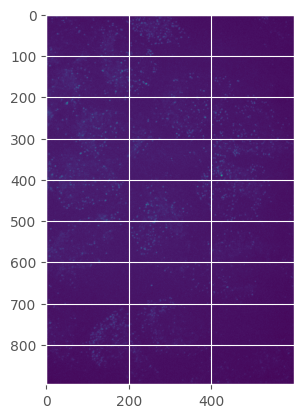

In [4]:
pipeline.run_up_to('SimpleCellposeSegmentaion')
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.max(pipelineData.list_images[0], axis=0)[:,:, 0])
plt.show()

INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU (CUDA)
INFO:cellpose.models:>> nuclei << model set to be used



 ###################### 
        IMAGE : 0
 ###################### 
    Image Name :   ROI001_XY1683820102_Z00_T0_C0
[2]
[1]
(896, 600, 3)
Nuclei Channel:  2
Cyto Channel:  1


INFO:cellpose.models:>>>> loading model C:\Users\Jack\.cellpose\models\nucleitorch_0
INFO:cellpose.models:>>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [[0, 2]]
INFO:cellpose.models:~~~ FINDING MASKS ~~~
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=106)
           2	RESUME(arg=0, lineno=106)
           4	LOAD_GLOBAL(arg=1, lineno=120)
          14	LOAD_ATTR(arg=2, lineno=120)
          34	LOAD_GLOBAL(arg=5, lineno=120)
          44	LOAD_FAST(arg=1, lineno=120)
          46	CALL(arg=1, lineno=120)
          54	LOAD_CONST(arg=1, lineno=120)
          56	BUILD_TUPLE(arg=2, lineno=120)
          58	LOAD_CONST(arg=2, lineno=120)
          60	CALL(arg=2, lineno=120)
          68	STORE_FAST(arg=2, lineno=120)
          70	LOAD_GLOBAL(arg=1, lineno=121)
          80	LOAD_ATTR(arg=2, lineno=121)
         100	LOAD_GLOBAL(arg=5, lineno=121)
         110	LOAD_FAST(arg=1, lineno=121)
         112	CALL(a

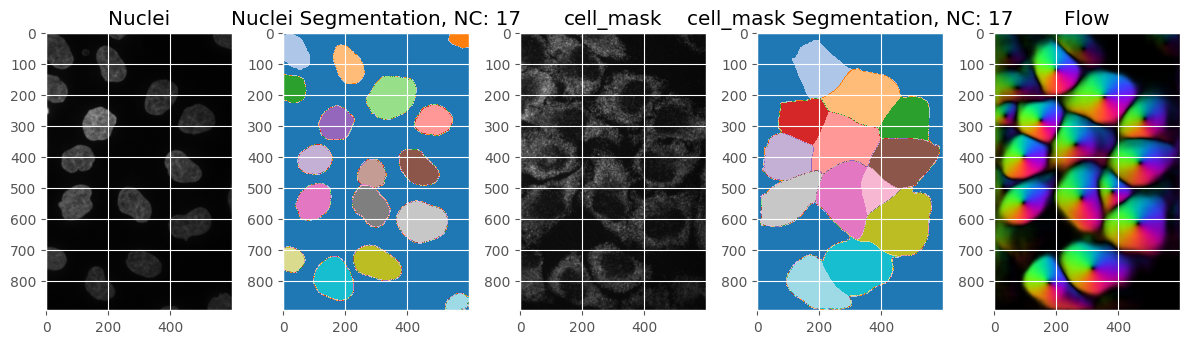

INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU (CUDA)
INFO:cellpose.models:>> nuclei << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\Jack\.cellpose\models\nucleitorch_0



 ###################### 
        IMAGE : 1
 ###################### 
    Image Name :   ROI001_XY1683820102_Z00_T0_C1
[2]
[1]
(896, 600, 3)
Nuclei Channel:  2
Cyto Channel:  1


INFO:cellpose.models:>>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [[0, 2]]
INFO:cellpose.models:~~~ FINDING MASKS ~~~
INFO:cellpose.models:>>>> TOTAL TIME 0.51 sec
INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU (CUDA)
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\Jack\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [[1, 2]]
INFO:cellpose.models:~~~ FINDING MASKS ~~~
INFO:cellpose.models:>>>> TOTAL TIME 1.03 sec


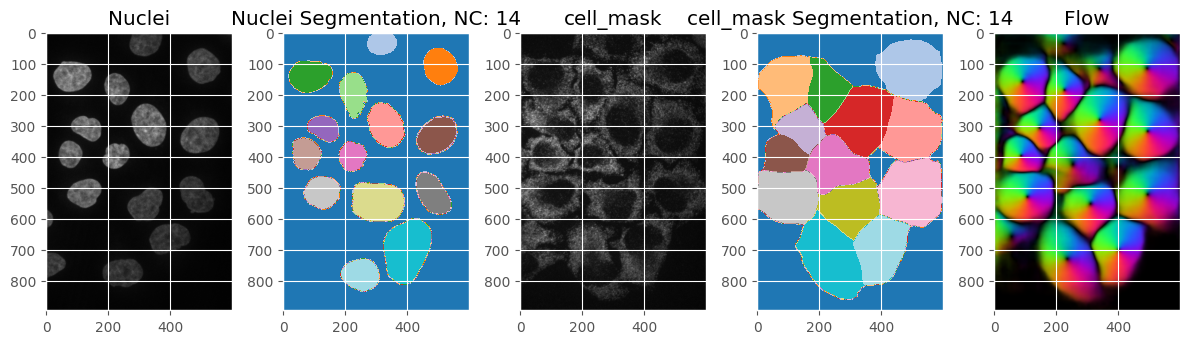

INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU (CUDA)
INFO:cellpose.models:>> nuclei << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\Jack\.cellpose\models\nucleitorch_0



 ###################### 
        IMAGE : 2
 ###################### 
    Image Name :   ROI001_XY1683820102_Z00_T0_C2
[2]
[1]
(896, 600, 3)
Nuclei Channel:  2
Cyto Channel:  1


INFO:cellpose.models:>>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [[0, 2]]
INFO:cellpose.models:~~~ FINDING MASKS ~~~
INFO:cellpose.models:>>>> TOTAL TIME 0.51 sec
INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU (CUDA)
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\Jack\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [[1, 2]]
INFO:cellpose.models:~~~ FINDING MASKS ~~~
INFO:cellpose.models:>>>> TOTAL TIME 0.81 sec


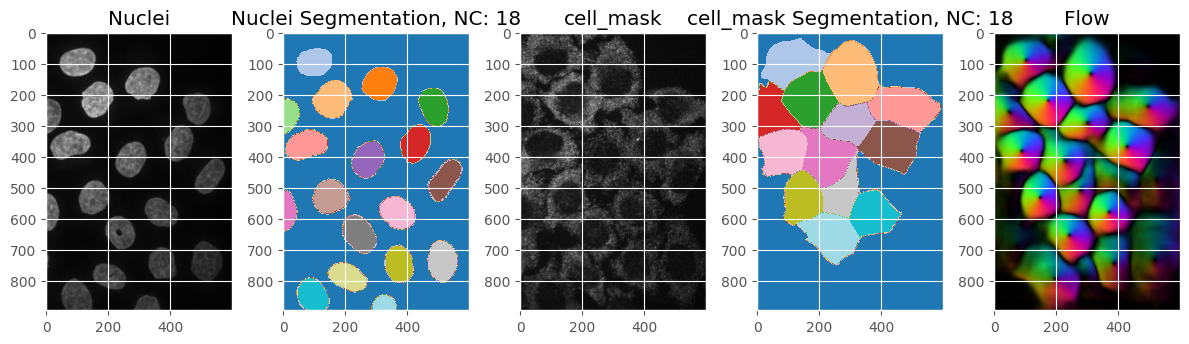

In [5]:
pipeline.run_single_step(SimpleCellposeSegmentaion(), {'bigfish_alpha': 0.2})